In [32]:
import tensorflow as tf

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, validation_split=.2)

In [3]:


train_df = train_datagen.flow_from_directory('./pizza_not_pizza/',
                                            target_size=(200, 200),
                                             subset='training',
                                            color_mode='rgb',
                                            class_mode='binary',
                                            batch_size=32,
                                            seed=0,
                                            shuffle=True)

val_df = train_datagen.flow_from_directory('./pizza_not_pizza/',
                                          target_size=(200, 200),
                                          color_mode='rgb',
                                          class_mode='binary',
                                          batch_size=32,
                                          seed=0,
                                          shuffle=True,
                                          subset='validation')

Found 1574 images belonging to 2 classes.
Found 392 images belonging to 2 classes.


In [10]:
images, labels = train_df.next()
len(images), len(labels), images[0].shape

(32, 32, (200, 200, 3))

In [15]:
def plot_random_images():
    """
    Plots 20 Random Images from the dataset
    """
    
    images, labels = train_df.next()
    labels = labels.astype('int32')
    i = 1

    plt.figure(figsize = (10, 5))
    
    for image, label in zip(images, labels):
        plt.subplot(4, 5, i)
        plt.imshow(image)
        plt.axis('off')
        i += 1
        if i == 21:
            break

    plt.tight_layout()       
    plt.show()

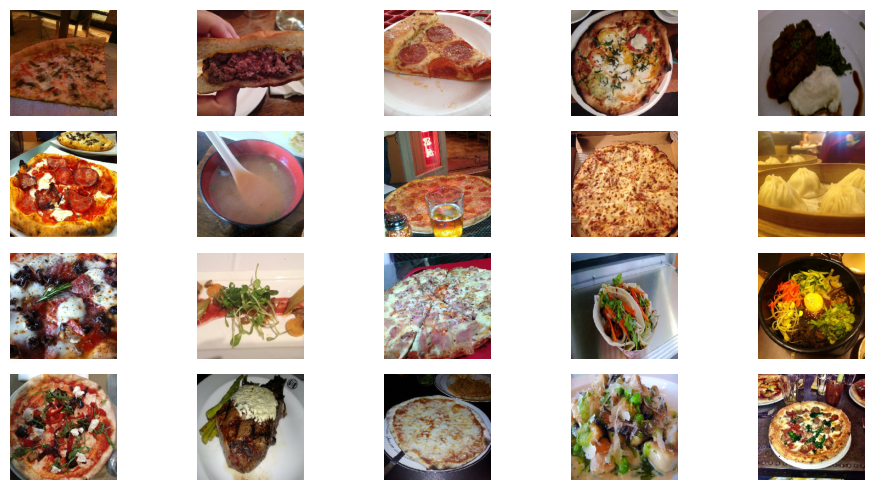

In [16]:
plot_random_images()

### Model 1 - Baseline

In [25]:
metrics = [tf.keras.metrics.Precision(),
          tf.keras.metrics.Recall()]

In [26]:
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(200, 200, 3)),
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
             loss=tf.keras.losses.BinaryCrossentropy(),
             metrics=metrics)

In [27]:
model.build()

In [28]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 99, 99, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 48, 48, 32)        0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 73728)             0         
                                                                 
 dense_6 (Dense)             (None, 128)              

In [29]:
history = model.fit(train_df, epochs=10, validation_data=val_df)

Epoch 1/10
50/50 [==============================] - 8s 124ms/step - loss: 1.3871 - precision: 0.5399 - recall: 0.5680 - val_loss: 0.6800 - val_precision: 0.6441 - val_recall: 0.1939
Epoch 2/10
50/50 [==============================] - 6s 121ms/step - loss: 0.6067 - precision: 0.6628 - recall: 0.7217 - val_loss: 0.6771 - val_precision: 0.8000 - val_recall: 0.2041
Epoch 3/10
50/50 [==============================] - 6s 127ms/step - loss: 0.5855 - precision: 0.6901 - recall: 0.7103 - val_loss: 0.5201 - val_precision: 0.7570 - val_recall: 0.8265
Epoch 4/10
50/50 [==============================] - 6s 128ms/step - loss: 0.4475 - precision: 0.7901 - recall: 0.7700 - val_loss: 0.5527 - val_precision: 0.8455 - val_recall: 0.5306
Epoch 5/10
50/50 [==============================] - 6s 129ms/step - loss: 0.3391 - precision: 0.8758 - recall: 0.8513 - val_loss: 0.4815 - val_precision: 0.7853 - val_recall: 0.7653
Epoch 6/10
50/50 [==============================] - 7s 132ms/step - loss: 0.2618 - precisi

In [62]:
def plot_loss_curves(history):
    """
    Plots the curves of both loss and accuracy
    """

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    precision = history.history['precision']
    val_precision = history.history['val_precision']
    
    recall = history.history['recall']
    val_recall = history.history['val_recall']
    
    epochs = range(len(loss))

    fig, ax = plt.subplots(1, 3, figsize = (20, 7))

    # Plotting loss
    ax1 = sns.lineplot(x = epochs, y = loss, label='Training Loss', ax= ax[0])
    ax1 = sns.lineplot(x = epochs, y = val_loss, label='Validation Loss', ax= ax[0])
    ax1.set(title = 'Loss', xlabel = 'Epochs')

    # Plot accuracy
    ax2 = sns.lineplot(x = epochs, y = precision, label='Training Precision', ax= ax[1])
    ax2 = sns.lineplot(x = epochs, y = val_precision, label='Validation Precision', ax=ax[1])
    ax2.set(title = 'Precision', xlabel = 'Epochs')
    
    # Plot accuracy
    ax3 = sns.lineplot(x = epochs, y = recall, label='Training Recall', ax= ax[2])
    ax3 = sns.lineplot(x = epochs, y = val_recall, label='Validation Recall', ax=ax[2])
    ax3.set(title = 'Recall', xlabel = 'Epochs')

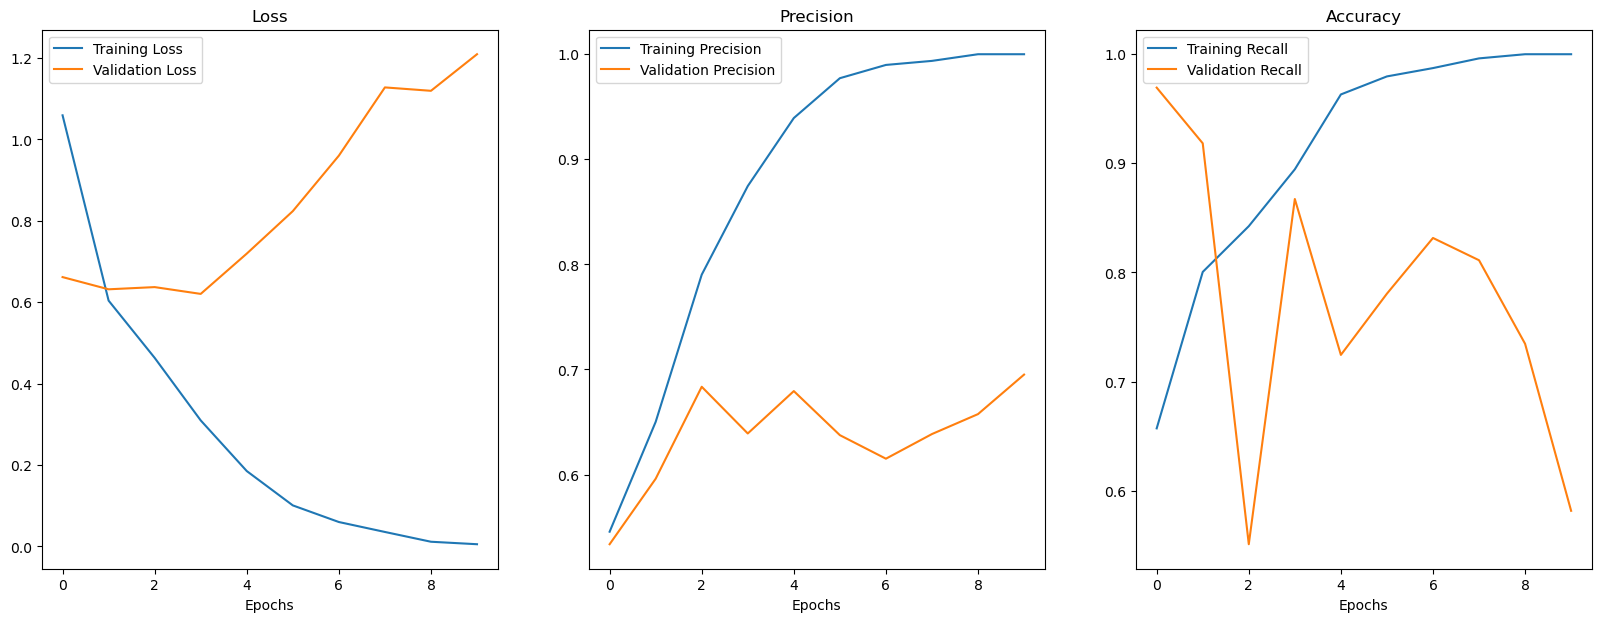

In [52]:
plot_loss_curves(history)

### Model 2 - Avoid overfitting model 1

In [36]:
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(200, 200, 3)),
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
             loss=tf.keras.losses.BinaryCrossentropy(),
             metrics=metrics)

In [37]:
model.build()

In [38]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 99, 99, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 48, 48, 32)        0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 73728)             0         
                                                                 
 dense_8 (Dense)             (None, 128)              

In [39]:
history = model.fit(train_df, epochs=10, validation_data=val_df)

Epoch 1/10
50/50 [==============================] - 8s 126ms/step - loss: 1.4714 - precision: 0.5670 - recall: 0.7406 - val_loss: 0.6743 - val_precision: 0.6416 - val_recall: 0.7398
Epoch 2/10
50/50 [==============================] - 6s 124ms/step - loss: 0.5996 - precision: 0.6944 - recall: 0.6900 - val_loss: 0.5988 - val_precision: 0.7207 - val_recall: 0.6582
Epoch 3/10
50/50 [==============================] - 7s 132ms/step - loss: 0.5373 - precision: 0.6975 - recall: 0.7942 - val_loss: 0.6240 - val_precision: 0.6796 - val_recall: 0.7143
Epoch 4/10
50/50 [==============================] - 6s 127ms/step - loss: 0.3826 - precision: 0.8140 - recall: 0.8895 - val_loss: 0.6798 - val_precision: 0.6878 - val_recall: 0.6633
Epoch 5/10
50/50 [==============================] - 6s 126ms/step - loss: 0.2383 - precision: 0.8999 - recall: 0.9365 - val_loss: 0.7525 - val_precision: 0.6581 - val_recall: 0.7857
Epoch 6/10
50/50 [==============================] - 7s 132ms/step - loss: 0.1540 - precisi

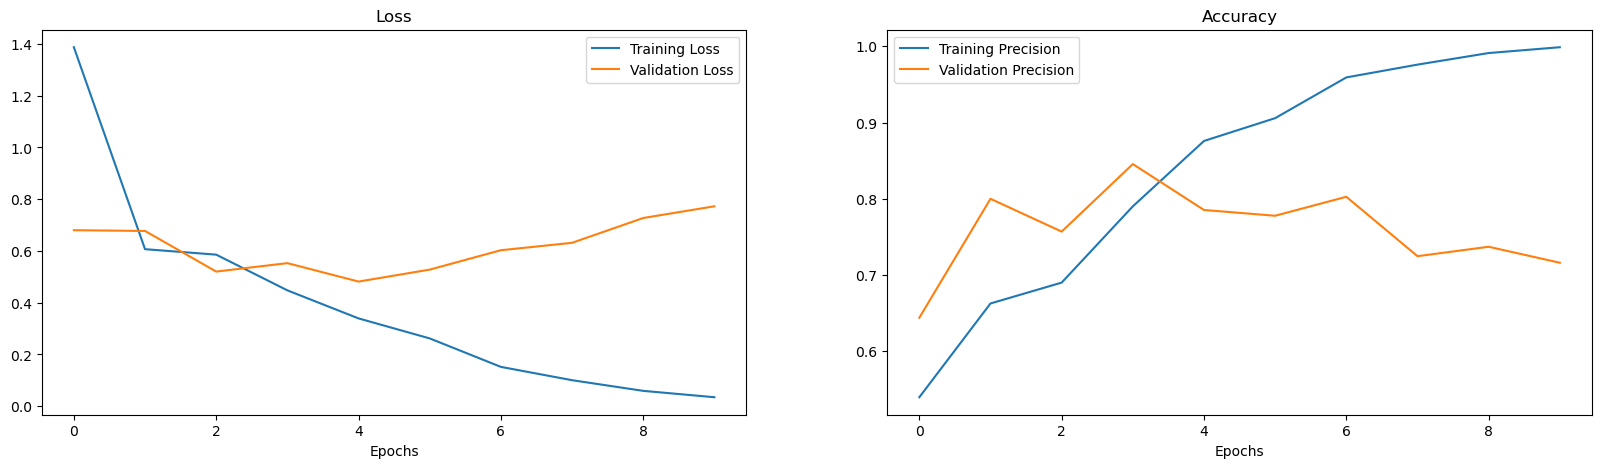

In [34]:
plot_loss_curves(history)

### Model 3 - Avoid overfitting model 1 and 2

In [57]:
data_augmentation = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                                   horizontal_flip=True,
                                                                   rotation_range=.2,
                                                                   height_shift_range=.1,
                                                                   width_shift_range=.1,
                                                                   zoom_range=.2,
                                                                   validation_split=.2)

validation_data = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, validation_split=.2)

train_df = train_datagen.flow_from_directory('./pizza_not_pizza/',
                                            target_size=(200, 200),
                                             subset='training',
                                            color_mode='rgb',
                                            class_mode='binary',
                                            batch_size=32,
                                            seed=0,
                                            shuffle=True)

val_df = validation_data.flow_from_directory('./pizza_not_pizza/',
                                          target_size=(200, 200),
                                          color_mode='rgb',
                                          class_mode='binary',
                                          batch_size=32,
                                          seed=0,
                                          shuffle=True,
                                          subset='validation')



Found 1574 images belonging to 2 classes.
Found 392 images belonging to 2 classes.


In [58]:
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(200, 200, 3)),
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
             loss=tf.keras.losses.BinaryCrossentropy(),
             metrics=metrics)

In [59]:
model.build()

In [60]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 99, 99, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 48, 48, 32)        0         
 ng2D)                                                           
                                                                 
 flatten_6 (Flatten)         (None, 73728)             0         
                                                                 
 dense_12 (Dense)            (None, 128)              

In [61]:
history = model.fit(train_df, epochs=10, validation_data=val_df)

Epoch 1/10
50/50 [==============================] - 8s 126ms/step - loss: 1.6056 - precision: 0.5582 - recall: 0.4975 - val_loss: 0.6714 - val_precision: 0.7015 - val_recall: 0.2398
Epoch 2/10
50/50 [==============================] - 6s 123ms/step - loss: 0.6389 - precision: 0.6671 - recall: 0.6264 - val_loss: 0.5930 - val_precision: 0.7212 - val_recall: 0.6071
Epoch 3/10
50/50 [==============================] - 6s 126ms/step - loss: 0.5782 - precision: 0.6910 - recall: 0.7217 - val_loss: 0.5797 - val_precision: 0.7603 - val_recall: 0.5663
Epoch 4/10
50/50 [==============================] - 6s 126ms/step - loss: 0.5156 - precision: 0.7402 - recall: 0.7675 - val_loss: 0.5524 - val_precision: 0.7458 - val_recall: 0.6735
Epoch 5/10
50/50 [==============================] - 7s 149ms/step - loss: 0.4274 - precision: 0.8175 - recall: 0.8196 - val_loss: 0.6356 - val_precision: 0.8632 - val_recall: 0.4184
Epoch 6/10
50/50 [==============================] - 7s 142ms/step - loss: 0.4204 - precisi

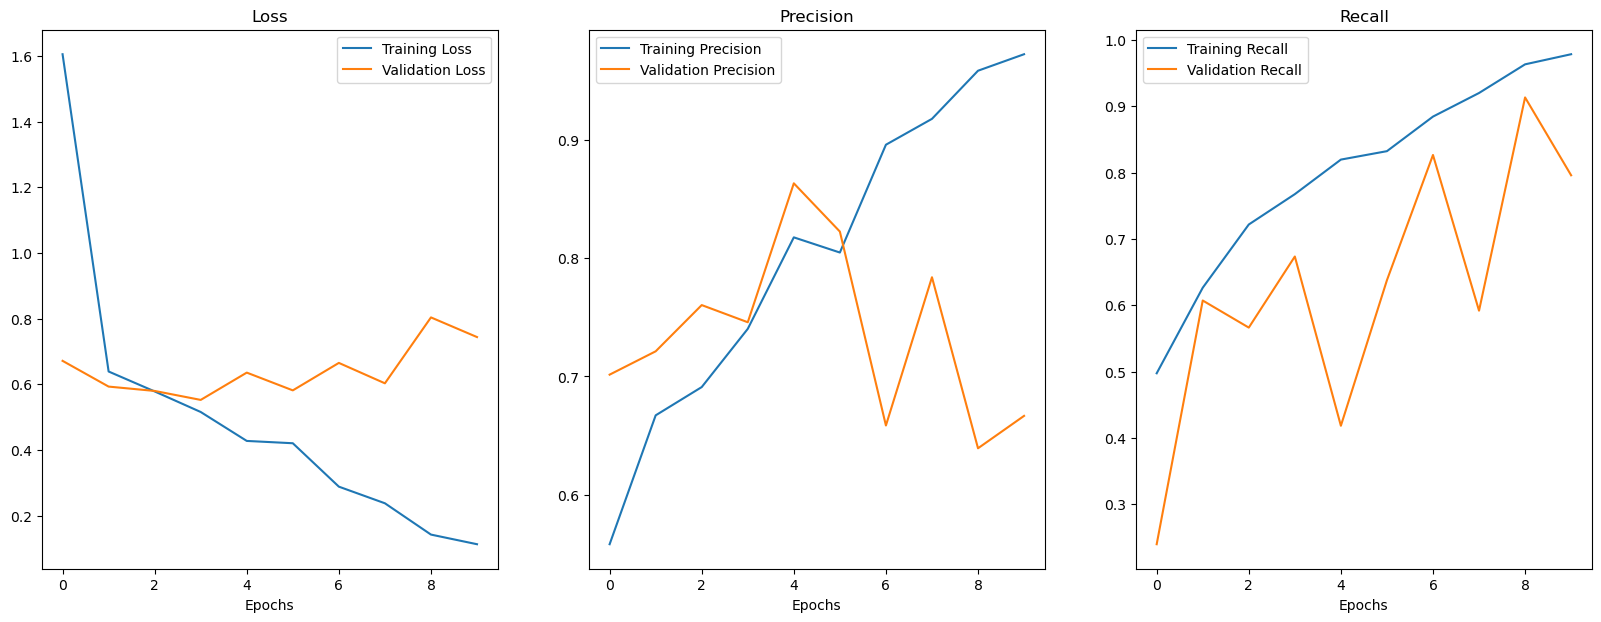

In [63]:
plot_loss_curves(history)

### Model 4 - Avoid overfitting

In [64]:
data_augmentation = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                                   horizontal_flip=True,
                                                                   rotation_range=.4,
                                                                   height_shift_range=.2,
                                                                   width_shift_range=.2,
                                                                   zoom_range=.4,
                                                                   validation_split=.2)

validation_data = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, validation_split=.2)

train_df = train_datagen.flow_from_directory('./pizza_not_pizza/',
                                            target_size=(200, 200),
                                             subset='training',
                                            color_mode='rgb',
                                            class_mode='binary',
                                            batch_size=32,
                                            seed=0,
                                            shuffle=True)

val_df = validation_data.flow_from_directory('./pizza_not_pizza/',
                                          target_size=(200, 200),
                                          color_mode='rgb',
                                          class_mode='binary',
                                          batch_size=32,
                                          seed=0,
                                          shuffle=True,
                                          subset='validation')



Found 1574 images belonging to 2 classes.
Found 392 images belonging to 2 classes.


In [65]:
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(200, 200, 3)),
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
             loss=tf.keras.losses.BinaryCrossentropy(),
             metrics=metrics)

In [66]:
model.build()

In [67]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 99, 99, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_15 (Conv2D)          (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 48, 48, 32)        0         
 ng2D)                                                           
                                                                 
 flatten_7 (Flatten)         (None, 73728)             0         
                                                                 
 dense_14 (Dense)            (None, 128)              

In [68]:
history = model.fit(train_df, epochs=10, validation_data=val_df)

Epoch 1/10
50/50 [==============================] - 8s 126ms/step - loss: 1.0552 - precision: 0.5437 - recall: 0.7528 - val_loss: 0.6693 - val_precision: 0.6288 - val_recall: 0.8469
Epoch 2/10
50/50 [==============================] - 6s 122ms/step - loss: 0.6055 - precision: 0.6494 - recall: 0.7789 - val_loss: 0.5882 - val_precision: 0.6421 - val_recall: 0.9337
Epoch 3/10
50/50 [==============================] - 6s 129ms/step - loss: 0.4870 - precision: 0.7736 - recall: 0.7814 - val_loss: 0.5453 - val_precision: 0.6846 - val_recall: 0.9082
Epoch 4/10
50/50 [==============================] - 6s 128ms/step - loss: 0.3627 - precision: 0.8535 - recall: 0.8437 - val_loss: 0.5435 - val_precision: 0.7013 - val_recall: 0.8265
Epoch 5/10
50/50 [==============================] - 6s 128ms/step - loss: 0.2394 - precision: 0.9271 - recall: 0.9047 - val_loss: 0.5614 - val_precision: 0.7302 - val_recall: 0.8010
Epoch 6/10
50/50 [==============================] - 6s 128ms/step - loss: 0.1614 - precisi

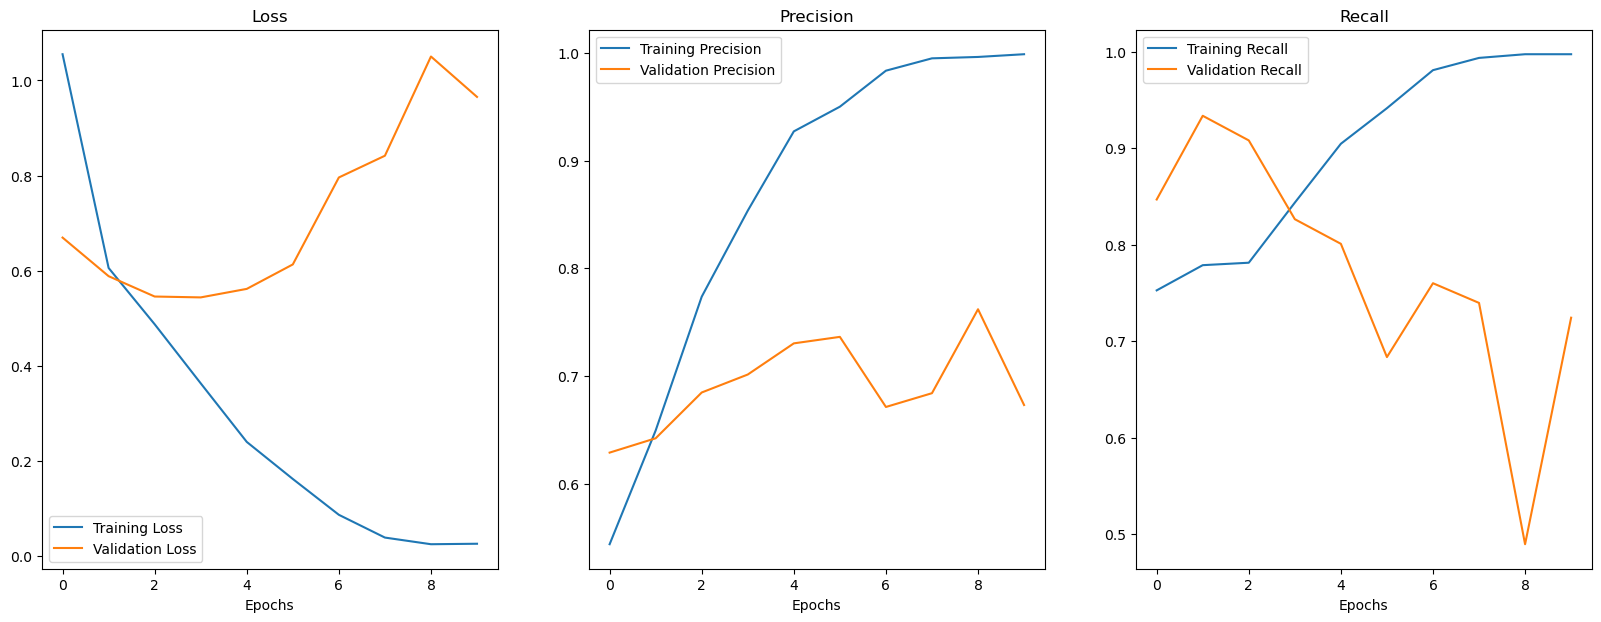

In [69]:
plot_loss_curves(history)

### Model 5 - Avoid overfitting and noise

In [71]:
data_augmentation = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                                   horizontal_flip=True,
                                                                   rotation_range=.4,
                                                                   height_shift_range=.2,
                                                                   width_shift_range=.2,
                                                                   zoom_range=.4,
                                                                   validation_split=.2)

validation_data = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, validation_split=.2)

train_df = train_datagen.flow_from_directory('./pizza_not_pizza/',
                                            target_size=(200, 200),
                                             subset='training',
                                            color_mode='rgb',
                                            class_mode='binary',
                                            batch_size=32,
                                            seed=0,
                                            shuffle=True)

val_df = validation_data.flow_from_directory('./pizza_not_pizza/',
                                          target_size=(200, 200),
                                          color_mode='rgb',
                                          class_mode='binary',
                                          batch_size=20,
                                          seed=0,
                                          shuffle=True,
                                          subset='validation')



Found 1574 images belonging to 2 classes.
Found 392 images belonging to 2 classes.


In [79]:
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(200, 200, 3)),
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
             loss=tf.keras.losses.BinaryCrossentropy(),
             metrics=metrics)

In [80]:
model.build()

In [81]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 99, 99, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_21 (Conv2D)          (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 48, 48, 32)        0         
 ng2D)                                                           
                                                                 
 flatten_10 (Flatten)        (None, 73728)             0         
                                                                 
 dense_20 (Dense)            (None, 128)             

In [82]:
history = model.fit(train_df, epochs=10, validation_data=val_df)

Epoch 1/10
50/50 [==============================] - 8s 133ms/step - loss: 0.9743 - precision: 0.6896 - recall: 0.6687 - val_loss: 0.6123 - val_precision: 0.6923 - val_recall: 0.6429
Epoch 2/10
50/50 [==============================] - 6s 129ms/step - loss: 0.6207 - precision: 0.6504 - recall: 0.6785 - val_loss: 0.5842 - val_precision: 0.7216 - val_recall: 0.6480
Epoch 3/10
50/50 [==============================] - 6s 129ms/step - loss: 0.5690 - precision: 0.7032 - recall: 0.7166 - val_loss: 0.5482 - val_precision: 0.7200 - val_recall: 0.8265
Epoch 4/10
50/50 [==============================] - 7s 133ms/step - loss: 0.5115 - precision: 0.7531 - recall: 0.7827 - val_loss: 0.5472 - val_precision: 0.8028 - val_recall: 0.5816
Epoch 5/10
50/50 [==============================] - 7s 133ms/step - loss: 0.4392 - precision: 0.8080 - recall: 0.8234 - val_loss: 0.5806 - val_precision: 0.6548 - val_recall: 0.9388
Epoch 6/10
50/50 [==============================] - 7s 132ms/step - loss: 0.3709 - precisi

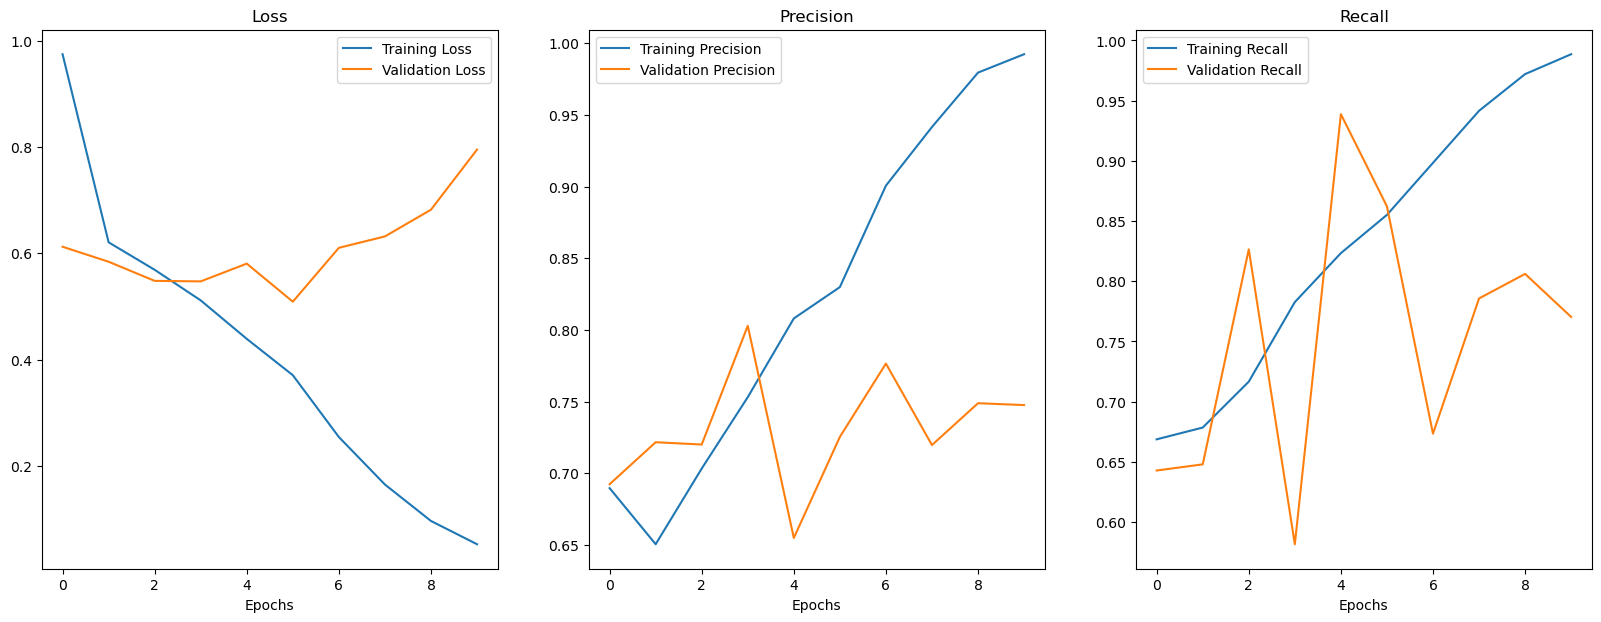

In [83]:
plot_loss_curves(history)